In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import preprocess_input

2022-12-04 02:12:57.608341: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
# Load the model
model = load_model(filepath='./xception_v4_16_0.868.h5')

2022-12-04 02:13:03.917364: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-04 02:13:03.924357: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-04 02:13:03.924989: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-04 02:13:03.926047: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

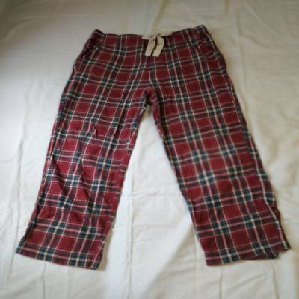

In [3]:
#Load the image
img = load_img(path='./clothing-dataset-small/test/pants/241836fb-0adb-402a-8417-9825051f8912.jpg', target_size=(299, 299))
img

In [4]:
# Process the image and load into file
img_arr = np.array(img)
X = np.array([img_arr])
X_ = preprocess_input(X)
X_.shape

(1, 299, 299, 3)

In [5]:
# Test the prediction
pred = model.predict(X_)

2022-12-04 02:13:08.048779: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-12-04 02:13:08.709220: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-04 02:13:08.710175: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-04 02:13:08.710212: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-12-04 02:13:08.711234: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-04 02:13:08.711321: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 3s 3s/step


In [6]:
pred

array([[ -2.0563972, -12.091369 ,  -2.5328522,  -2.9742365,   8.859225 ,
         -4.5537524, -10.736547 ,   1.3264986,  -5.1859384,  -9.04622  ]],
      dtype=float32)

In [7]:
classes = ['dress',
 'hat',
 'longsleeve',
 'outwear',
 'pants',
 'shirt',
 'shoes',
 'shorts',
 'skirt',
 't-shirt']

In [8]:
# classes
pred_classes = dict(zip(classes, pred[0]))

In [9]:
# Predictions
{k: v for k, v in sorted(pred_classes.items(), key=lambda item: item[1], reverse=True)}

{'pants': 8.859225,
 'shorts': 1.3264986,
 'dress': -2.0563972,
 'longsleeve': -2.5328522,
 'outwear': -2.9742365,
 'shirt': -4.5537524,
 'skirt': -5.1859384,
 't-shirt': -9.04622,
 'shoes': -10.736547,
 'hat': -12.091369}

# Convert kersa to tf-lite

In [10]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as model_file:
    model_file.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpj5z8kl7_/assets


INFO:tensorflow:Assets written to: /tmp/tmpj5z8kl7_/assets
2022-12-04 02:13:33.239399: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-12-04 02:13:33.239445: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-12-04 02:13:33.240456: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmpj5z8kl7_
2022-12-04 02:13:33.279436: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2022-12-04 02:13:33.279480: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /tmp/tmpj5z8kl7_
2022-12-04 02:13:33.388296: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2022-12-04 02:13:33.419856: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-12-04 02:13:34.008154: I tensorflow/cc/saved_model/loader.cc:212] Running initializatio

In [11]:
!pip install tflite-runtime

  Using cached tflite_runtime-2.10.0-cp39-cp39-manylinux2014_x86_64.whl (2.5 MB)


In [12]:
import tflite_runtime.interpreter as tflite

In [13]:
# Load model
interpreter = tflite.Interpreter(model_path="./model.tflite")
interpreter.allocate_tensors()
input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [14]:
# Invoke the model
interpreter.set_tensor(input_index, X_)
interpreter.invoke()
pred = interpreter.get_tensor(output_index)

In [15]:
# Prepare and process predictons
classes = ['dress',
 'hat',
 'longsleeve',
 'outwear',
 'pants',
 'shirt',
 'shoes',
 'shorts',
 'skirt',
 't-shirt']

# classes
pred_classes = dict(zip(classes, pred[0]))
prediction = {k: v for k, v in sorted(pred_classes.items(), key=lambda item: item[1], reverse=True)}

In [16]:
# predictions
print(prediction)

{'pants': 8.859228, 'shorts': 1.3264965, 'dress': -2.0563943, 'longsleeve': -2.532853, 'outwear': -2.9742358, 'shirt': -4.553757, 'skirt': -5.1859384, 't-shirt': -9.046216, 'shoes': -10.736537, 'hat': -12.091368}


# Removing tensorflow dependency

In [17]:
from PIL import Image

In [18]:
with Image.open('./clothing-dataset-small/test/pants/241836fb-0adb-402a-8417-9825051f8912.jpg') as img:
    img = img.resize(size=(299, 299), resample=Image.Resampling.NEAREST)

In [19]:
def preprocess_input(x):
    """Function to preproces image for Tensorflow lite"""
    
    x /= 127.5
    x -= 1.0
    return x

In [20]:
img_arr = np.array(img, dtype='float32')
X = np.array([img_arr])
X_ = preprocess_input(X)
X_.shape

(1, 299, 299, 3)

In [21]:
# Invoke the model
interpreter.set_tensor(input_index, X_)
interpreter.invoke()
pred = interpreter.get_tensor(output_index)

# classes
pred_classes = dict(zip(classes, pred[0]))
prediction = {k: v for k, v in sorted(pred_classes.items(), key=lambda item: item[1], reverse=True)}

print(prediction)

{'pants': 8.859228, 'shorts': 1.3264965, 'dress': -2.0563943, 'longsleeve': -2.532853, 'outwear': -2.9742358, 'shirt': -4.553757, 'skirt': -5.1859384, 't-shirt': -9.046216, 'shoes': -10.736537, 'hat': -12.091368}
